# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [15]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [17]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [18]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(browser.html, 'html.parser')

In [19]:
# Extract all rows of data
table = soup.find('table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [20]:
# Create an empty list
rows = []

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr')[1:]:  # Skip the header row
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]  # Extract text from each column
    rows.append(cols)

In [21]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
headers = [header.text.strip() for header in table.find_all('th')]
df = pd.DataFrame(rows, columns=headers)

In [22]:
# Confirm DataFrame was created successfully
print(df.head())

   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [23]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [25]:
# Change data types for data analysis

# Convert 'terrestrial_date' to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'], errors='coerce')

# Convert 'sol', 'ls', and 'month' to int32
df['sol'] = df['sol'].astype('int32', errors='ignore')
df['ls'] = df['ls'].astype('int32', errors='ignore')
df['month'] = df['month'].astype('int32', errors='ignore')

# Convert 'min_temp' and 'pressure' to float64
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')

In [26]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [28]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print("Number of months on Mars:", num_months)


Number of months on Mars: 12


In [29]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = df['sol'].nunique()
print("Number of Martian days in the dataset:", num_sols)


Number of Martian days in the dataset: 1867


In [32]:
# 3. What is the average minimum temperature by month?
# Group by month and calculate the average minimum temperature for each month
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Display the result
print(avg_min_temp_by_month)



month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


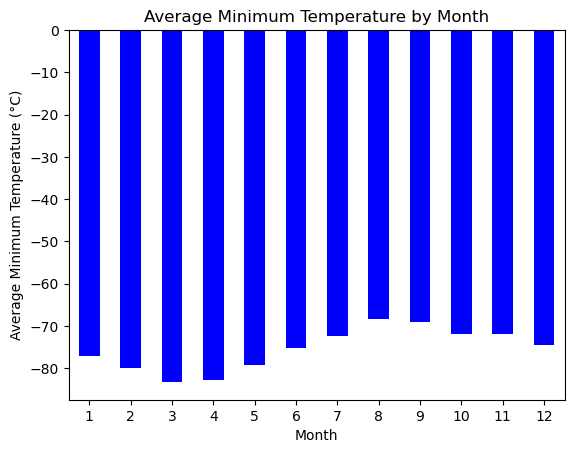

In [39]:
# Plot the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar', title="Average Minimum Temperature by Month", color='blue')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)  # Optional: keeps month labels horizontal
plt.show()

Coldest month: 3 with an average minimum temperature of -83.31°C
Hottest month: 8 with an average minimum temperature of -68.38°C


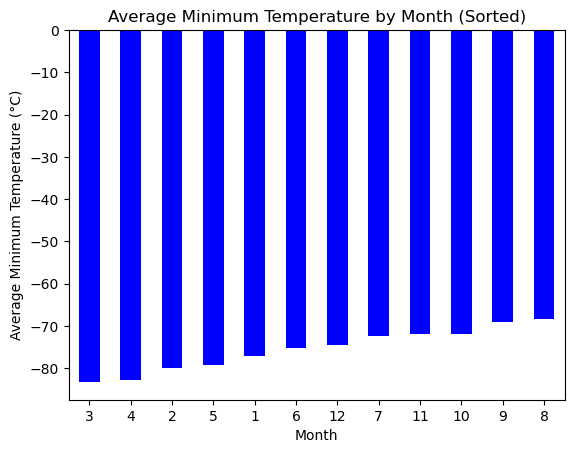

In [35]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Sort the average minimum temperature by month
sorted_avg_min_temp = avg_min_temp_by_month.sort_values()

# Identify the coldest month (lowest temperature)
coldest_month = sorted_avg_min_temp.idxmin()
coldest_temp = sorted_avg_min_temp.min()

# Identify the hottest month (highest temperature)
hottest_month = sorted_avg_min_temp.idxmax()
hottest_temp = sorted_avg_min_temp.max()

# Print the results
print(f"Coldest month: {coldest_month} with an average minimum temperature of {coldest_temp:.2f}°C")
print(f"Hottest month: {hottest_month} with an average minimum temperature of {hottest_temp:.2f}°C")

# Plot the sorted result (to visualize the coldest and hottest months)
sorted_avg_min_temp.plot(kind='bar', title="Average Minimum Temperature by Month (Sorted)", color='blue')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)  # Optional: keeps month labels horizontal
plt.show()


In [36]:
# 4. What is the average pressure by month?
# Group by month and calculate the average atmospheric pressure for each month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Display the result
print(avg_pressure_by_month)


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


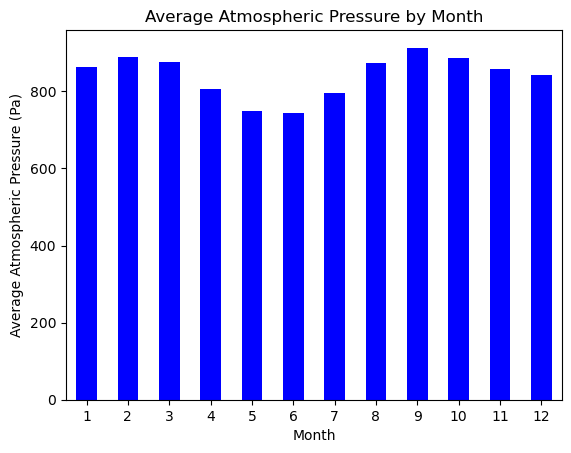

In [38]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar', title="Average Atmospheric Pressure by Month", color='blue')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.xticks(rotation=0)  # Optional: keeps month labels horizontal
plt.show()

Month with lowest pressure: 6 with an average pressure of 745.05 Pa
Month with highest pressure: 9 with an average pressure of 913.31 Pa


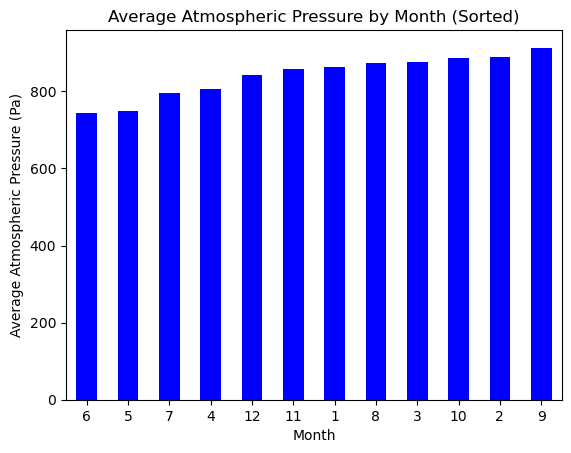

In [41]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Sort the average atmospheric pressure by month
sorted_avg_pressure = avg_pressure_by_month.sort_values()

# Identify the lowest pressure month (minimum pressure)
lowest_pressure_month = sorted_avg_pressure.idxmin()
lowest_pressure = sorted_avg_pressure.min()

# Identify the highest pressure month (maximum pressure)
highest_pressure_month = sorted_avg_pressure.idxmax()
highest_pressure = sorted_avg_pressure.max()

# Print the results
print(f"Month with lowest pressure: {lowest_pressure_month} with an average pressure of {lowest_pressure:.2f} Pa")
print(f"Month with highest pressure: {highest_pressure_month} with an average pressure of {highest_pressure:.2f} Pa")

# Plot the sorted result (to visualize the lowest and highest pressure months)
sorted_avg_pressure.plot(kind='bar', title="Average Atmospheric Pressure by Month (Sorted)", color='blue')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.xticks(rotation=0)  
plt.show()


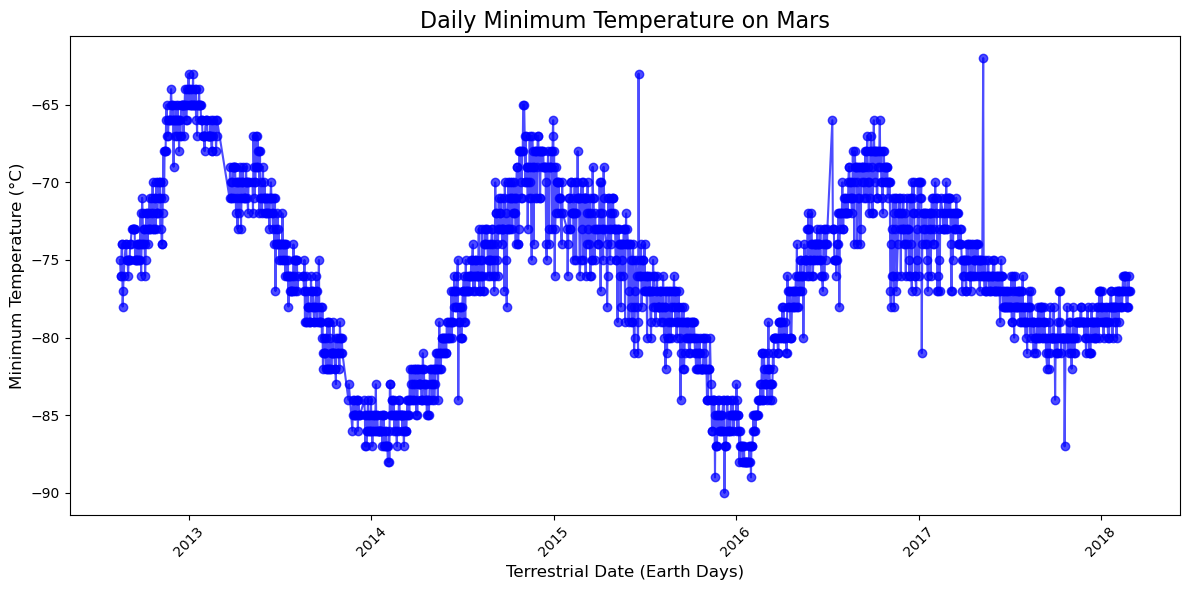

In [42]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Plot the daily minimum temperature over time
plt.figure(figsize=(12, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], marker='o', linestyle='-', color='b', alpha=0.7)

# Add titles and labels
plt.title('Daily Minimum Temperature on Mars', fontsize=16)
plt.xlabel('Terrestrial Date (Earth Days)', fontsize=12)
plt.ylabel('Minimum Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


#### Minimum Temperature
1. Which month, on average, has the lowest temperature? The highest?

Coldest Month: The coldest month on Mars, at Curiosity's location, is Month 3, with an average minimum temperature of -83.31°C. This month likely experiences fewer sunlight hours and colder conditions due to its position in the Martian orbit or its seasonal characteristics.

Hottest Month: The hottest month is Month 8, with an average minimum temperature of -68.38°C. This month likely experiences more sunlight or a more favorable position in the Martian orbit, leading to warmer temperatures compared to the other months.




#### Atmospheric Pressure
2. Which month, on average, has the lowest atmospheric pressure? The highest?

Lowest Pressure Month: The lowest atmospheric pressure occurs in Month 6, with an average pressure of 745.05 Pa. This lower pressure could be due to colder temperatures, which cause the Martian atmosphere to contract, resulting in thinner air during this period.

Highest Pressure Month: The highest atmospheric pressure is observed in Month 9, with an average pressure of 913.31 Pa. Warmer temperatures, possibly due to more direct sunlight or other atmospheric factors, would cause the atmosphere to expand, leading to higher pressure during this month.

#### Year Length
3. How many terrestrial days exist in a Martian year? A visual estimate within 25% was made.

A Martian year lasts about 687 Earth days. This period is the time Mars takes to complete one orbit around the Sun, which is longer than an Earth year because Mars is farther from the Sun.

Visual Estimate: By examining the plot of the daily minimum temperature over time, you can observe periodic temperature fluctuations. Each cycle represents one Martian year. By counting the number of Earth days it takes for the temperature to complete a full cycle, we can visually estimate the number of Earth days in a Martian year. This visual estimate should fall within the range of 515 to 859 Earth days, but the true value is approximately 687 Earth days, confirming that the estimate is within 25% of the correct Martian year length.



### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [43]:
# Write the data to a CSV
df.to_csv('mars_data.csv', index=False)

# Confirmation message
print("Data has been written to 'mars_data.csv'")


Data has been written to 'mars_data.csv'


In [44]:
browser.quit()